In [11]:
!pip install missingno

In [12]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
'''
이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
'''

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [13]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
print(len(df_train.columns))
for col in df_train.columns:
    msg = 'columns: {:>10}\t percent of NaN value: {:.2f}%' .format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

12
columns: PassengerId	 percent of NaN value: 0.00%
columns:   Survived	 percent of NaN value: 0.00%
columns:     Pclass	 percent of NaN value: 0.00%
columns:       Name	 percent of NaN value: 0.00%
columns:        Sex	 percent of NaN value: 0.00%
columns:        Age	 percent of NaN value: 19.87%
columns:      SibSp	 percent of NaN value: 0.00%
columns:      Parch	 percent of NaN value: 0.00%
columns:     Ticket	 percent of NaN value: 0.00%
columns:       Fare	 percent of NaN value: 0.00%
columns:      Cabin	 percent of NaN value: 77.10%
columns:   Embarked	 percent of NaN value: 0.22%


In [17]:
print(len(df_test.columns))
for col in df_test.columns:
    msg = 'columns: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

11
columns: PassengerId	 percent of NaN value: 0.00%
columns:     Pclass	 percent of NaN value: 0.00%
columns:       Name	 percent of NaN value: 0.00%
columns:        Sex	 percent of NaN value: 0.00%
columns:        Age	 percent of NaN value: 20.57%
columns:      SibSp	 percent of NaN value: 0.00%
columns:      Parch	 percent of NaN value: 0.00%
columns:     Ticket	 percent of NaN value: 0.00%
columns:       Fare	 percent of NaN value: 0.24%
columns:      Cabin	 percent of NaN value: 78.23%
columns:   Embarked	 percent of NaN value: 0.00%


- mano 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있음

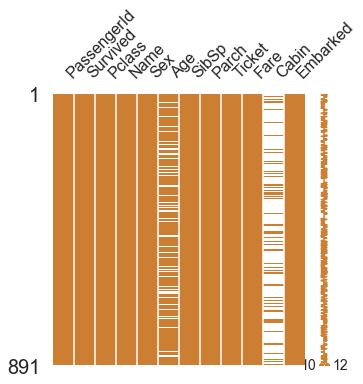

In [18]:
msno.matrix(df = df_train.iloc[:, :], figsize=(5, 5), color=(0.8,0.5,0.2))

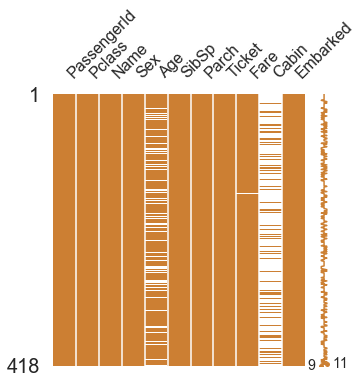

In [19]:
msno.matrix(df_test.iloc[:, :], figsize=(5, 5), color=(0.8,0.5,0.2))

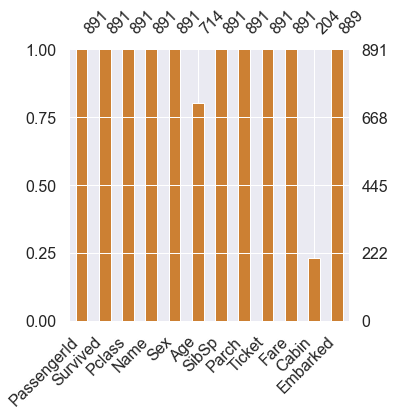

In [20]:
msno.bar(df_train.iloc[:, :], figsize=(5, 5), color=(0.8,0.5,0.2))

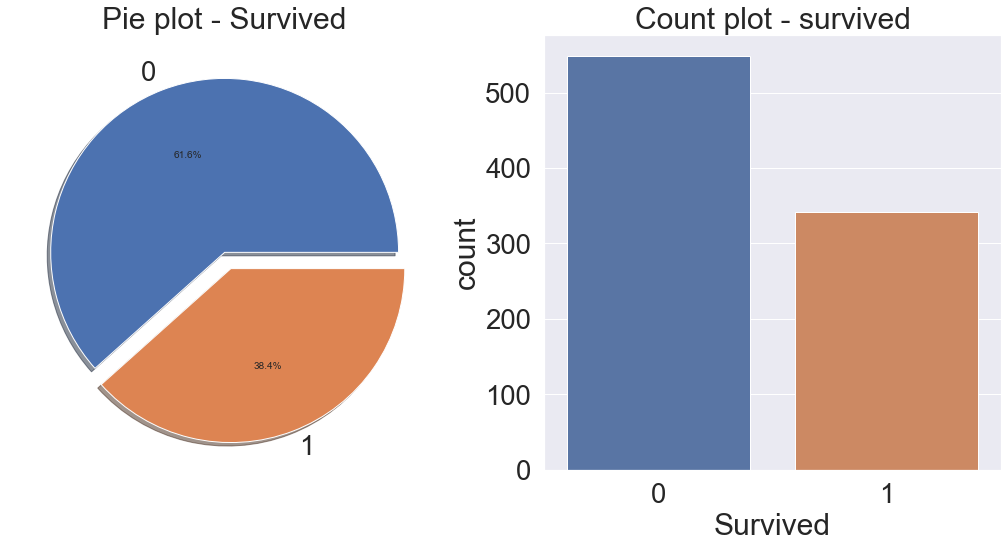

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

## EDA

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.1 Pclass

- 먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다
- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas 의 crosstab 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있습니다.

In [25]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


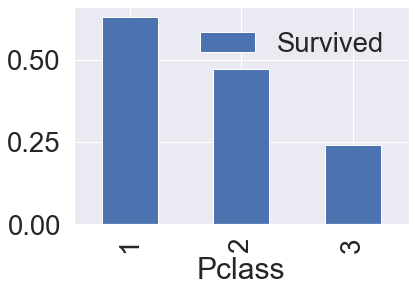

In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보다시피, Pclass 가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.
- 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해볼 수 있습니다.

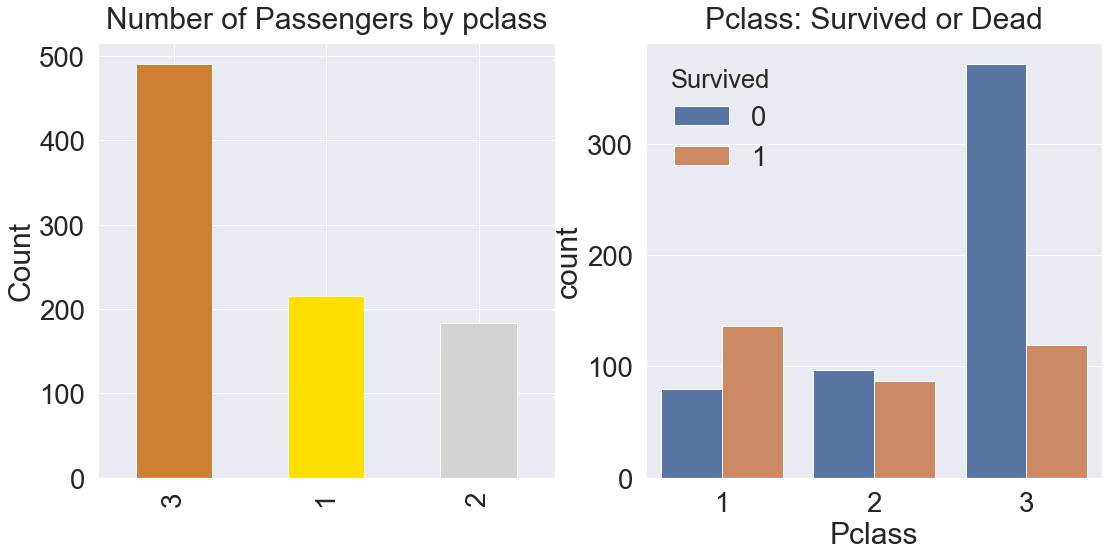

In [27]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers by pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived or Dead', y = y_position)
plt.show()

### 2.2 Sex

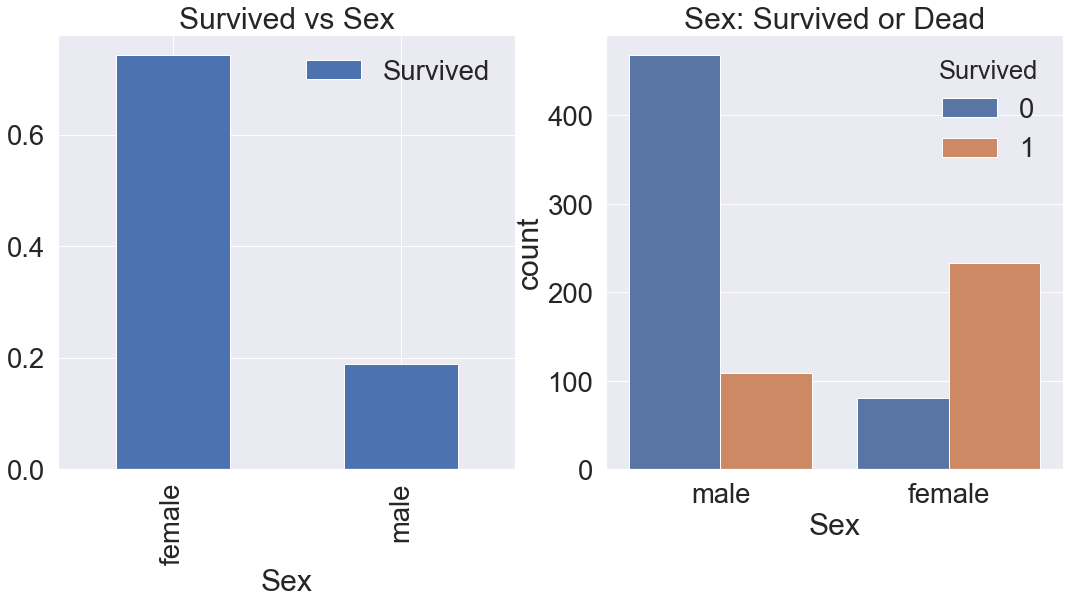

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived or Dead')
plt.show()

In [29]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [30]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


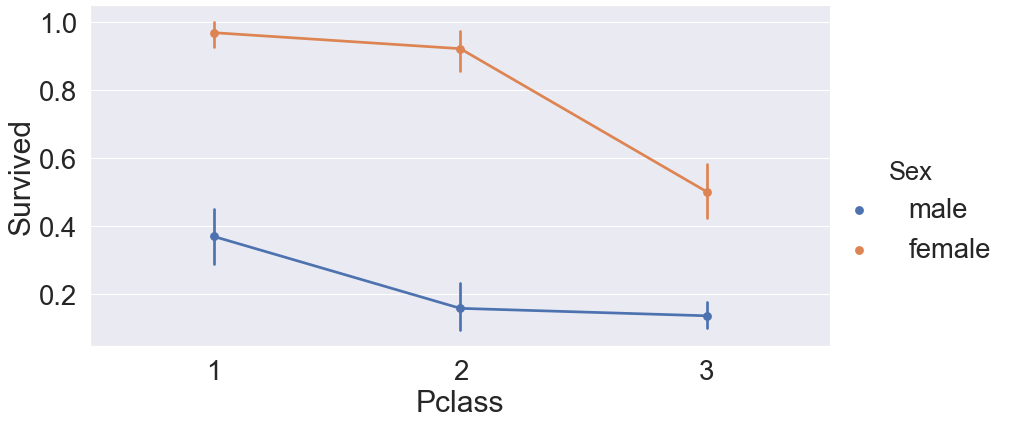

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=2)

- 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.
- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.
- 위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다

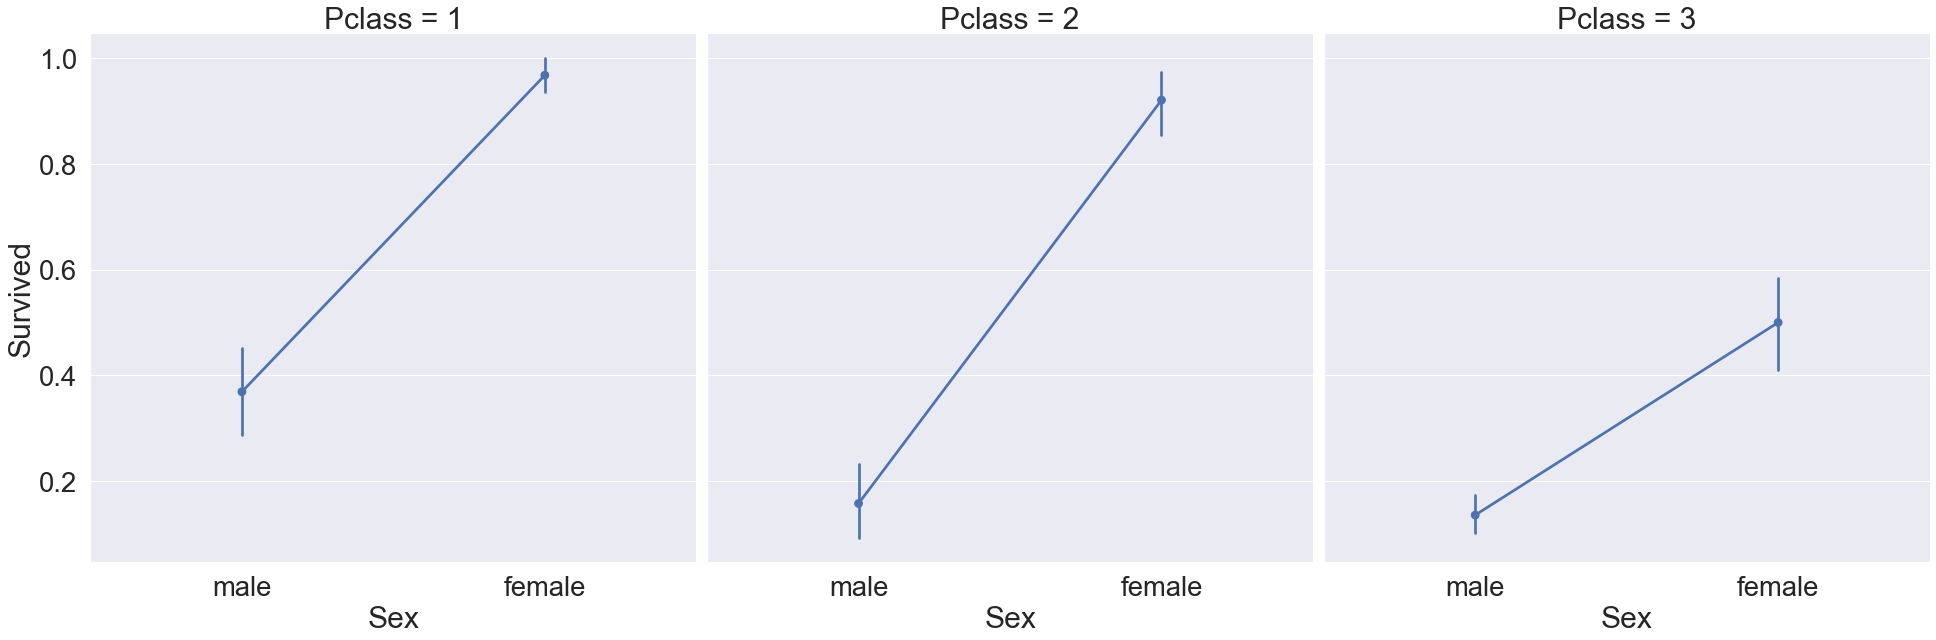

In [32]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=5, size=9, aspect=1)

### 2.4 Age

In [33]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


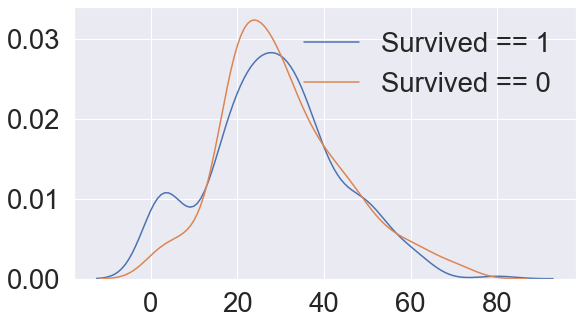

In [34]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

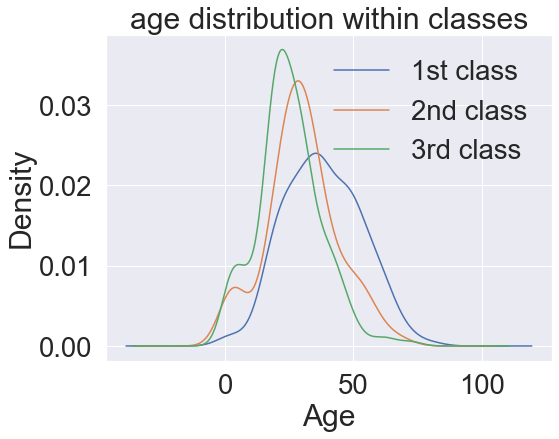

In [35]:
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('age distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

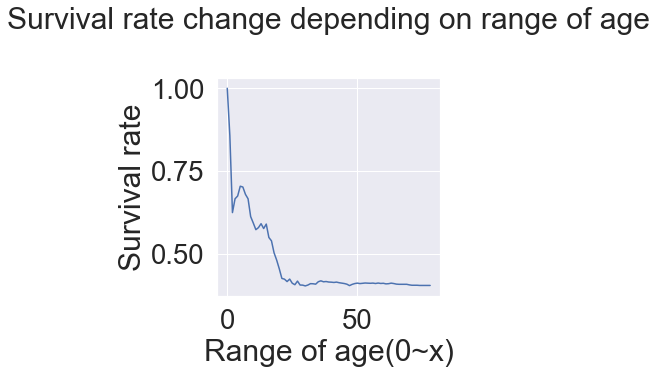

In [36]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(4, 4))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of age', y=1.2)
plt.ylabel('Survival rate')
plt.xlabel('Range of age(0~x)')
plt.show()

### 2.5 Pclass, Sex, Age
- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

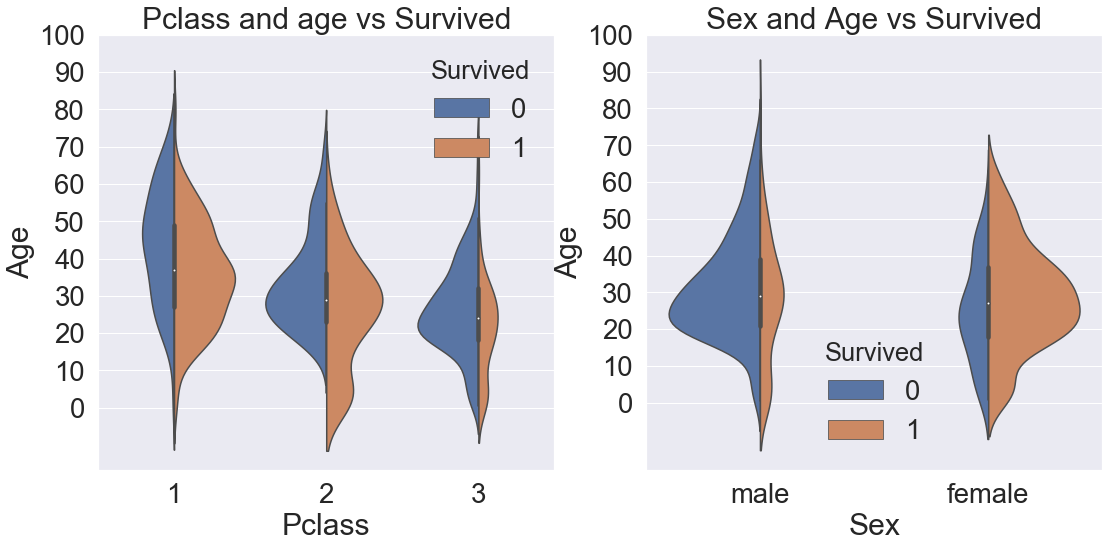

In [37]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


- 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
- 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

### 2.6. Embarked

- Embarked 는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.

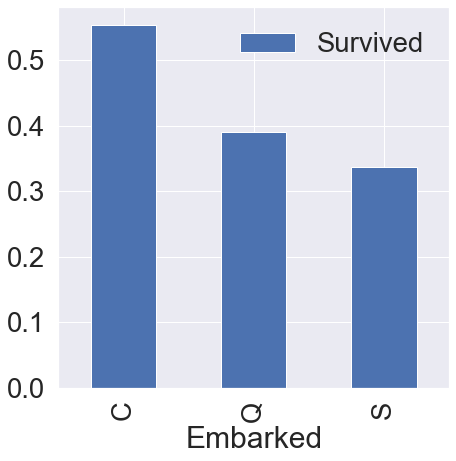

In [38]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한 거 같습니다. 그래도 C가 제일 높군요.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
- 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
- 다른 feature 로 split 하여 한번 살펴보겠습니다

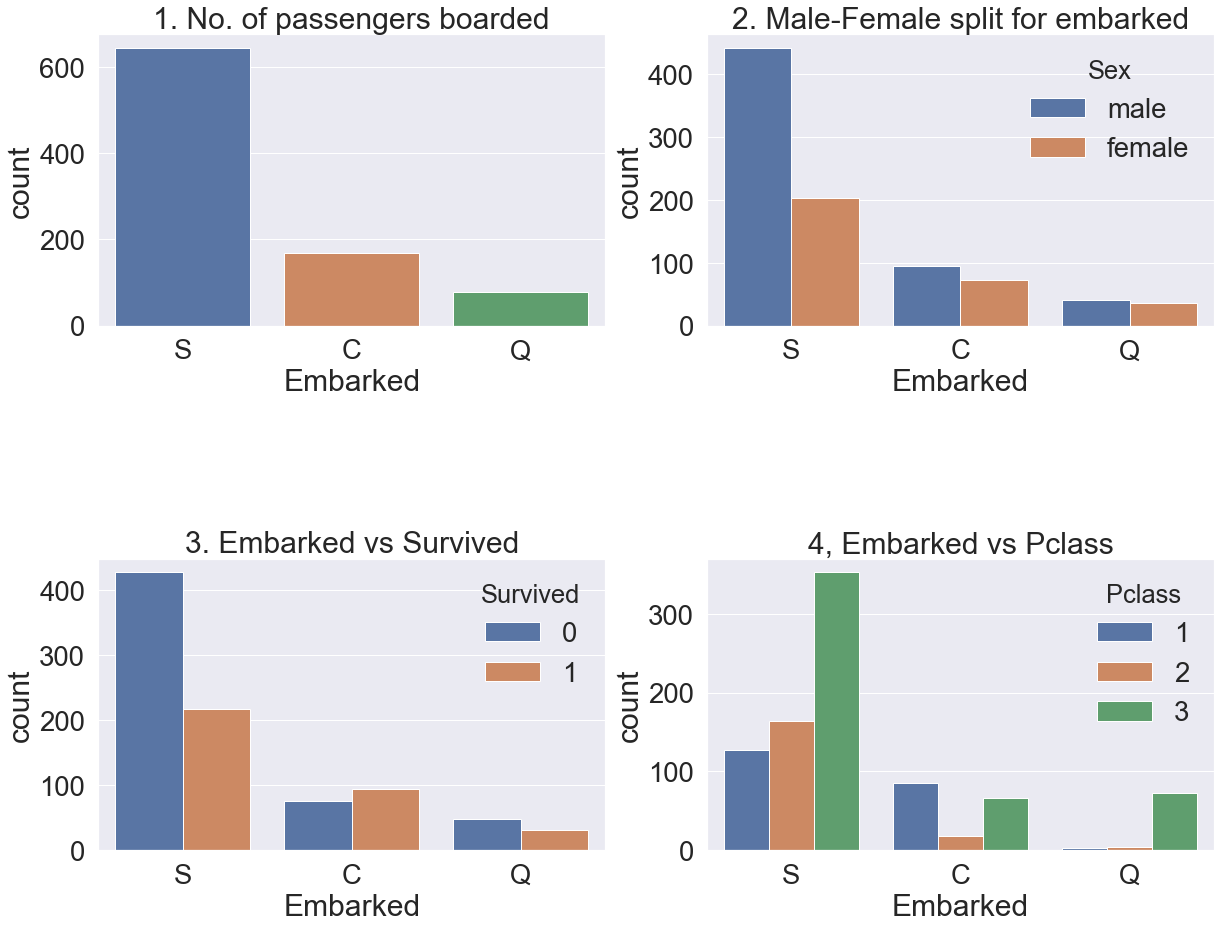

In [39]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('1. No. of passengers boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('2. Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('3. Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('4, Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

### 2.7 Family - SibSp(형제 자매) + Parch(부모 자녀)


- SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [40]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print('Maximum size of Family: ', df_train['FamilySize'].max())

Maximum size of Family:  11


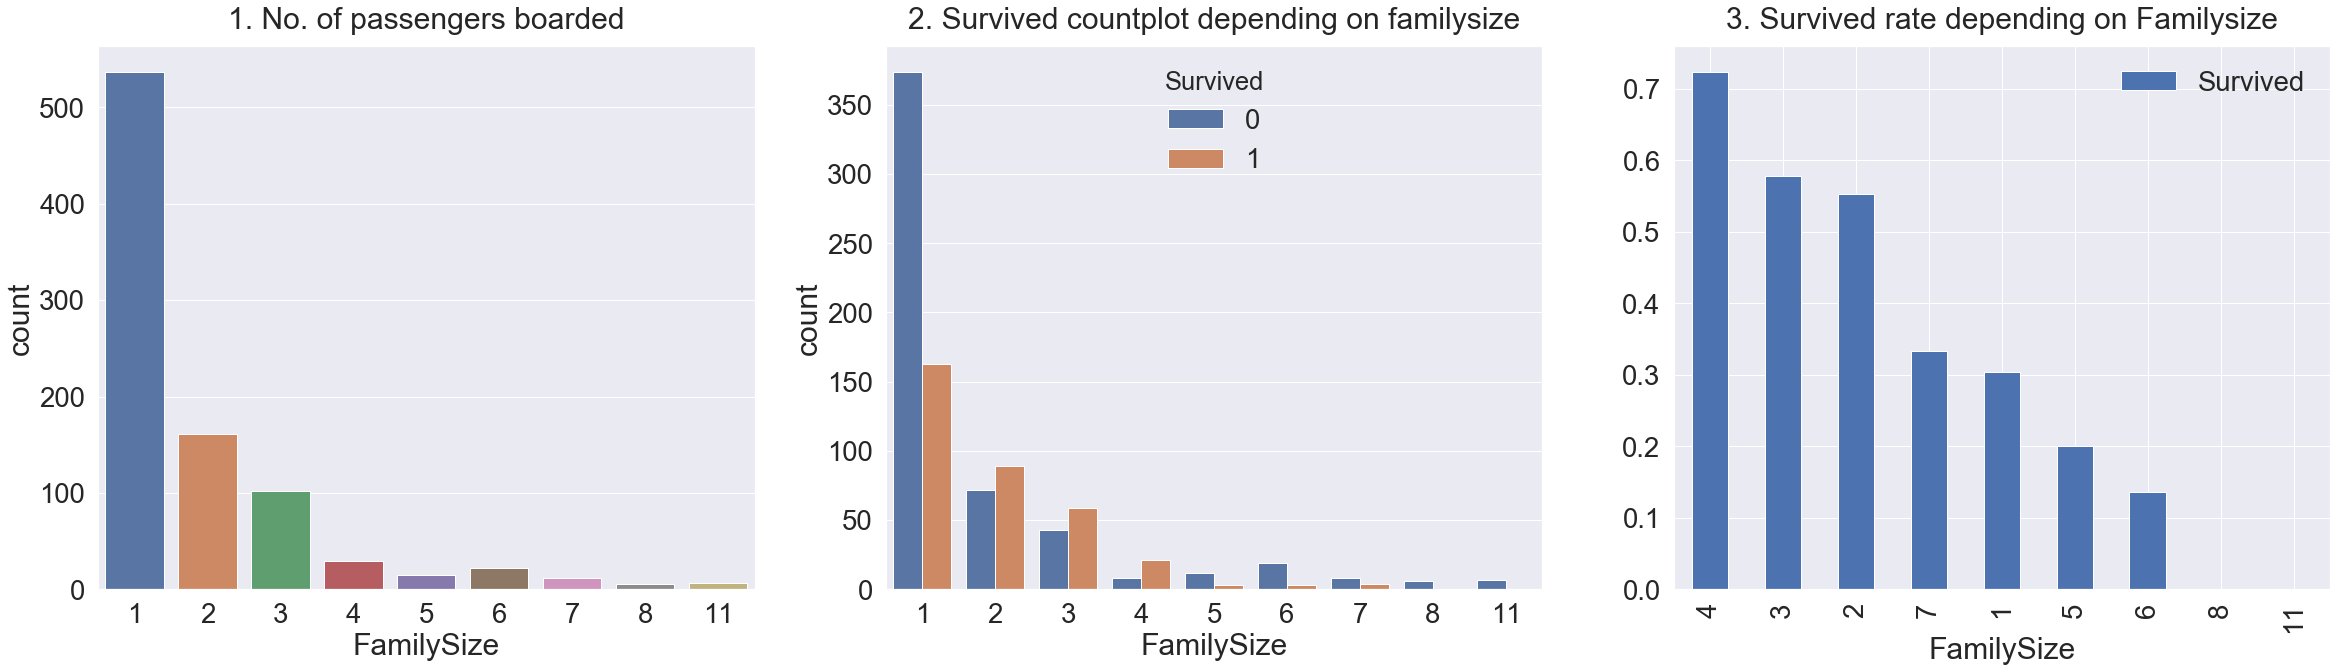

In [41]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('1. No. of passengers boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('2. Survived countplot depending on familysize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('3. Survived rate depending on Familysize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

### 2.8 Fare

- Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.

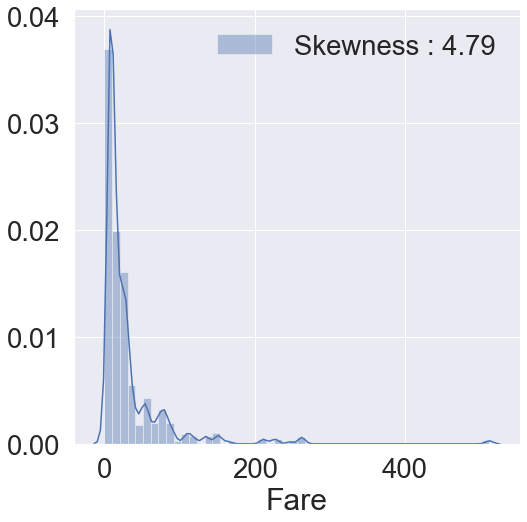

In [42]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [43]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset에 있는 nan value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

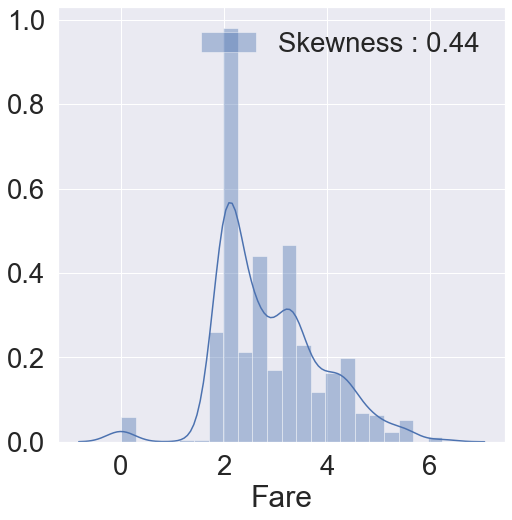

In [44]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

### 2.9 Cabin

- 해당 feature는 missing value가 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않음
- 그러므로 우리가 세우려는 모델에 포함시키지 않음

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket

- 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [46]:
df_train['Ticket'].value_counts()

1601          7
347082        7
CA. 2343      7
347088        6
3101295       6
             ..
349214        1
2641          1
7540          1
C 7075        1
C.A. 31026    1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature Engineering

- 본격적인 feature engineering 을 시작해보겠습니다.
- 가장 먼저, dataset 에 존재하는 null data를 채우려고 합니다.
- 아무 숫자로 채울 수는 없고, null data 를 포함하는 feature 의 statistics 를 참고하거나, 다른 아이디어를 짜내어 채울 수 있습니다.
- null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.
- Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만아닐라 test 도 똑같이 적용해주어야 합니다. 잊지맙시다.

### 3.1 Fill Null

- Age 에는 null data가 177개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데, 여기서 우리는 title + statistics 를 사용해 보겠습니다.
- 영어에서는 Miss, Mrr, Mrs 같은 title이 존재합니다. 각 탑승객의 이름에는 꼭 이런 title 이 들어가게 되는데 이를 사용해보겠습니다.
- pandas series 에는 data 를 string 으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있습니다. 이를 사용하여 title 을 쉽게 추출할 수 있습니다. title을 Initial column에 저장하겠습니다

In [47]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

- pandas 의 crosstab 을 이용하여 우리가 추출한 Initial 과 Sex 간의 count 를 살펴봅시다.

In [48]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 위 table 을 참고하여, 남자, 여자가 쓰는 initial 을 구분해 보겠습니다. replace 메소드를 사용하면, 특정 데이터 값을 원하는 값으로 치환해줍니다.

In [49]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'], 
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [50]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


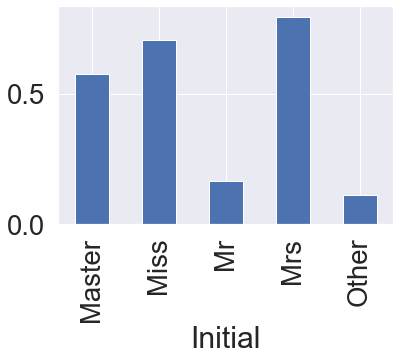

In [51]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- 이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다. statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다. 여기서는 statistics 를 활용하는 방법을 사용할 것입니다.
- 여기서 statistics 는 train data 의 것을 의미합니다. 우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며, train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.

In [52]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해 Null value 를 채우도록 하겠습니다.
- pandas dataframe 을 다룰 때에는 boolean array를 이용해 indexing 하는 방법이 참으로 편리합니다.
- 아래 코드 첫줄을 해석하자면, isnull() 이면서 Initial 이 Mr 인 조건을 만족하는 row(탑승객) 의 'Age' 의 값을 33으로 치환한다 입니다.
- loc + boolean + column 을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해집시다.

In [53]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] == 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] == 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] == 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] == 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] == 46

df_test.loc[(df_train.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] == 33
df_test.loc[(df_train.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] == 36
df_test.loc[(df_train.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] == 5
df_test.loc[(df_train.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] == 22
df_test.loc[(df_train.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] == 46

Series([], Name: Age, dtype: bool)

- 여기선 간단하게 Null을 채웠지만, 좀 더 다양한 방법을 쓴 예시들이 다른 커널에 존재합니다
- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 보시면서 공부해보세요!
이 외에도 다른 캐글러들의 커널을 보며 여러 참신한 아이디어를 살펴보세요! 

### 3.1.2 Fill Null Embarked

- Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로, 간단하게 Null 을 S로 채우겠습니다.
- dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다

In [54]:
df_train['Embarked'].fillna('S', inplace=True)

### 3.2 Change Age(continuous to categorical)

- Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만, Age 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다. continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만, 본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.
- 방법은 여러가지가 있습니다. dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고, 아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.
- 첫번째로 loc 를 사용한 방법입니다. loc 는 자주쓰게 되므로 그 사용법을 숙지하시면 좋습니다.
나이는 10살 간격으로 나누겠습니다.

In [55]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [56]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_test['Age_cat'] = df_test['Age'].apply(category_age)

### 3.3 Change Initial, Embarked and Sex (string to numerical)

- 현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.
- map method 를 가지고 간단히 할 수 있습니다.
- 사전 순서대로 정리하여 mapping 하겠습니다

In [57]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

- Embarked 도 C, Q, S로 이루어져 있습니다. map 을 이용해 바꿔봅시다.
- 그러기 앞서서, 특정 column 에 어떤 값들이 있는 지 확인해보는 방법을 잠깐 살펴보겠습니다. 간단히 unique() 메소드를 쓰거나, value_counts() 를 써서 count 까지 보는 방법이 있습니다.

In [58]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [59]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

- 한번 Null 이 사라졌는지 확인해봅시다. Embarked Column만 가져온 것은 하나의 pandas의 Series 객체므로, isnull() 메소드를 사용해 Series의 값들이 null 인지 아닌지에 대한 boolean 값을 얻을 수 있습니다. 그리고 이것에 any() 를 사용하여, True 가 단하나라도 있을 시(Null이 한개라도 있을 시) True 를 반환해주게 됩니다. 우리는 Null 을 S로 다 바꿔주었으므로 False 를 얻게 됩니다

In [61]:
df_train['Embarked'].isnull().any()

False

In [62]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

- 여지껏 고생하셨습니다. 이제 각 feature 간의 상관관계를 한번 보려고 합니다. 두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미합니다. 구하는 수식은 아래와 같습니다.

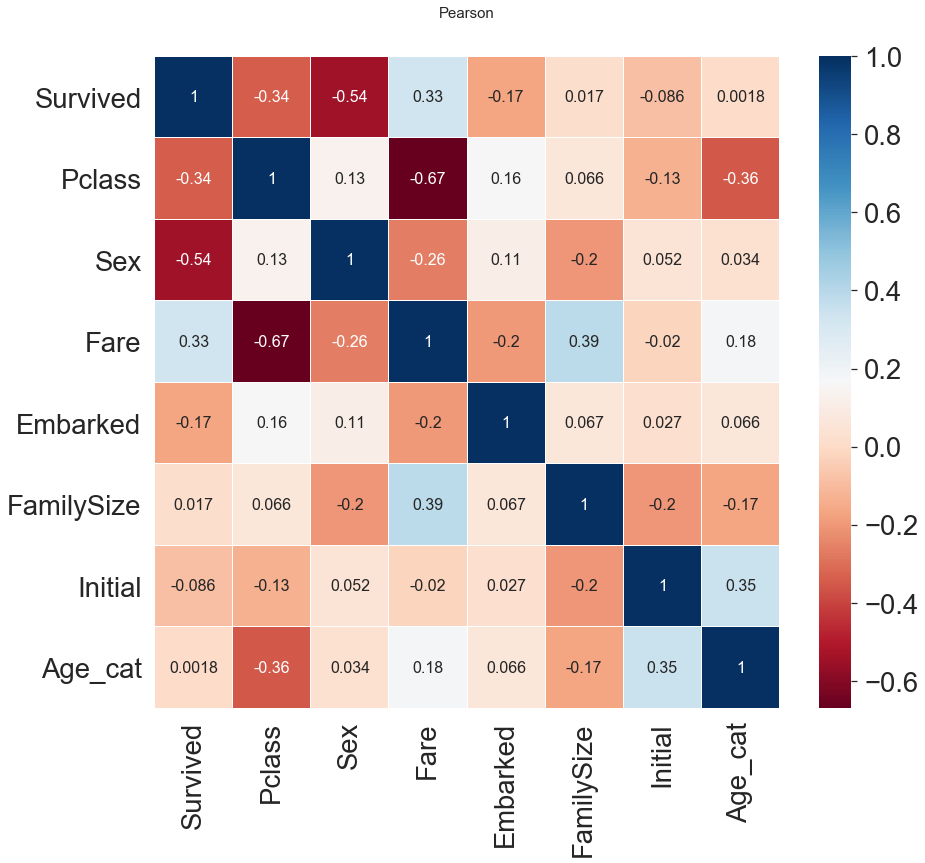

In [65]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

del heatmap_data

- 우리가 EDA에서 살펴봤듯이, Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.
- 생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.
- 또한 우리가 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.
- 이것은 우리가 모델을 학습시킬 때, 불필요한(redundant, superfluous) feature 가 없다는 것을 의미합니다. 1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.
- 이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다. 거의 다 와갑니다 힙냅시다!

### 3.4 One-hot encoding on Initial and Embarked

- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
- 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말합니다.
- One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.

- 위와 같은 작업을 직접 코딩할 수도 있지만, pandas 의 get_dummies 를 사용하여 쉽게 해결 할 수 있습니다.
- 총 5개의 카테고리니, one-hot encoding 을 하고 나면 새로운 5개의 column 이 생겨납니다.
- Initial 을 prefix로 두어서 구분이 쉽게 만들어 줍니다.

In [66]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [69]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

- 아주 쉽게 one-hot encoding 을 적용했습니다.
- sklearn 로 Labelencoder + OneHotencoder 이용해도 one-hot encoding 이 가능합니다.
- 다른 튜토리얼에서 한번 써보겠습니다. 여기서는 get_dummies 로 충분히 가능하기 때문에 get_dummies 만으로 끝내겠습니다.
- 가끔 category 가 100개가 넘어가는 경우가 있습니다. 이때 one-hot encoding을 사용하면 column이 100개가 생겨, 학습시 매우 버거울 경우가 있습니다. 이런 경우는 다른 방법을 사용하기도 하는데, 이는 다음에 한번 다뤄보겠습니다.